<a href="https://colab.research.google.com/github/Ironsoldier353/diabetes_prediction/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database


Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 16.7MB/s]


In [3]:
import zipfile

with zipfile.ZipFile('pima-indians-diabetes-database.zip', 'r') as zip_ref:
    zip_ref.extractall('./')


In [4]:
import pandas as pd

# Load the dataset (replace 'diabetes.csv' with the actual filename if different)
data = pd.read_csv('diabetes.csv')
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Check for missing values
print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


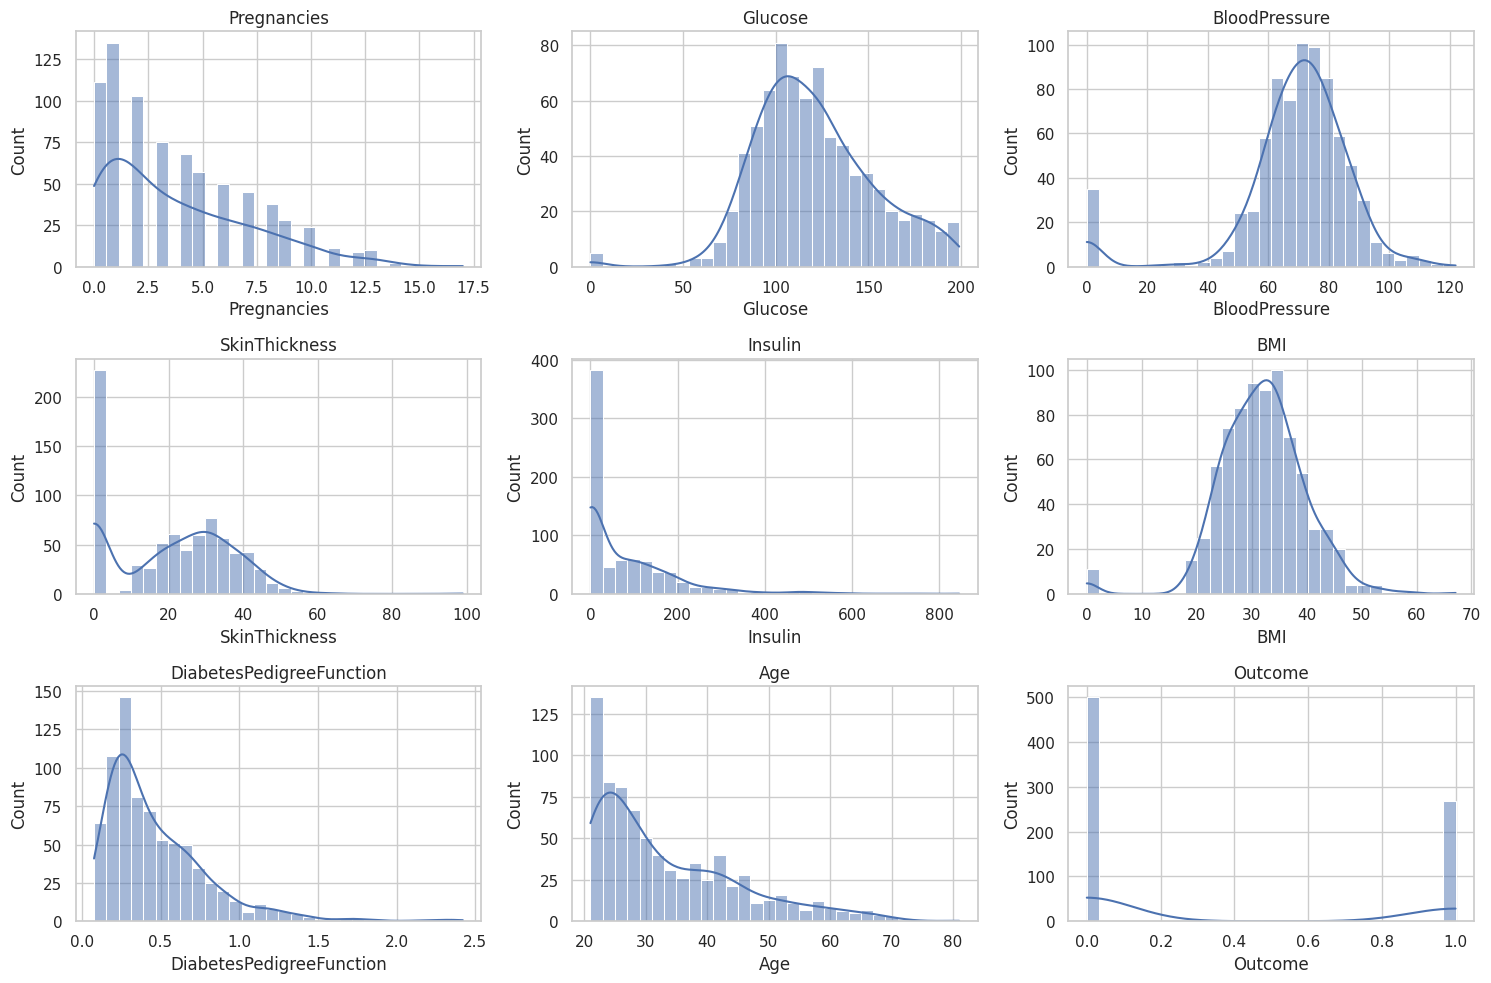

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Create a grid of histograms for each feature
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.histplot(data[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


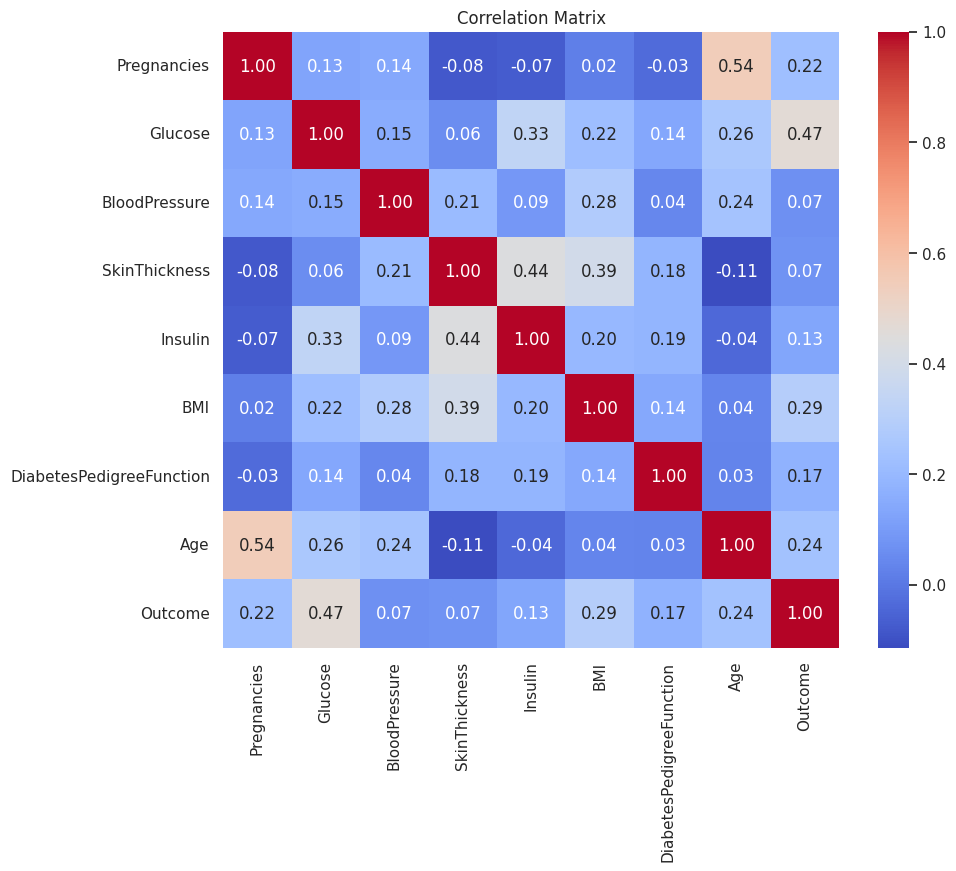

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Define feature matrix (X) and target variable (y)
X = data.drop(columns='Outcome')  # Features
y = data['Outcome']  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
# Create the logistic regression model
logistic_model = LogisticRegression(max_iter=200)

# Train the model
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Make predictions and evaluate the model
y_pred_logistic = logistic_model.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

